Artificial Intelligence (AI) enhances cybersecurity by safeguarding users' sensitive data and digital identities against threats like identity theft. In today's IoT era, increasing connections expand attack surfaces, elevating leakage risks. Protecting user accounts is crucial for data integrity and corporate reputation, reinforced by strict regulations such as the EU's General Data Privacy Regulation (GDPR).

**Passwords and Other Common Authentication Practices**

Passwords are critical for protecting digital identities, yet users often reuse them, increasing vulnerability to attacks such as identity theft and fraud. Once compromised, attackers can misuse stolen credentials for illegal activities. Beyond verifying passwords, monitoring abnormal login behaviors—like access from unusual locations or devices—is essential. Automated anomaly detection algorithms analyze user patterns to flag suspicious activities. Although biometric and OTP-based multi-factor authentication are common, they have vulnerabilities if compromised. Therefore, integrating predictive fraud detection with anomaly monitoring is vital for proactive security, ensuring that fraudulent activities are identified and mitigated before causing significant harm.

**Prevention of Fake Account Creation**

The prevention of creating fake accounts is very much important to protect the authentic users from the illegal activities carried out by those accounts. The identification of fake profiles are possible while observing the activation of numerous new accounts being carried out by the same IP address within a very shorter span of time, for instance, less than an hour. This kind of activity can be carried out by a bot.

**Account Reputation Scores**

Account reputation scores help monitor user activity, including both new and existing accounts, to detect malicious actions. This scoring system identifies stealthy attacks by analyzing behavior, using alarm systems to detect abnormal activity. Key features for estimating reputation include post frequency, proxy/VPN usage, uncommon user agents, and typing speed. These factors are used to train algorithms that dynamically assess reputation scores, enabling AI-based detection of suspicious behavior and classifying threats effectively.

**Example of Keystroke Dynamics Detection for User Authentication**

Keystroke dynamics capture the unique rhythm of each person’s typing. Raw data can be contaminated by external factors like interruptions or special function keys. To improve accuracy, it's essential to clean the data, transforming it into features that represent the user's keyboard dynamics. Like other biometric traits (iris, fingerprints, etc.), keystroke patterns help reliably identify individuals. The dataset, available in .csv format, includes data from 51 subjects typing 400 passwords, with measures like keydown-keydown (DD) and keyup-keydown (UD) times. You can access it here: https:// www. cs. cmu. edu/ ~keystroke/ DSL- StrongPasswordData. csv .

<ipython-input-6-494be6352d21>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot['subject'] = pwd_data['subject'].values


<Axes: title={'center': 'Average Keystroke Latency per Subject'}>

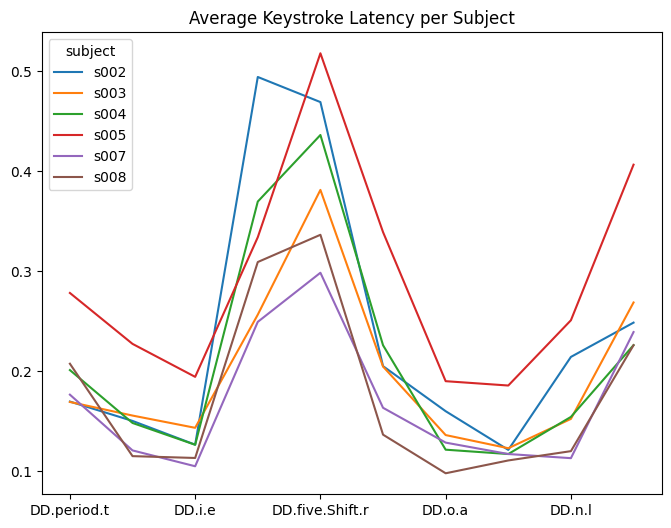

In [6]:
import numpy as np    #Imports the NumPy library, which is used for numerical computing and handling arrays in Python.
import pandas as pd   #Imports the Pandas library, which is used for data manipulation and analysis,
from matplotlib import pyplot as plt   #Imports pyplot from the matplotlib library, which is used for creating visualizations.
%matplotlib inline   #IPython magic command used to display Matplotlib plots directly within a Jupyter notebook or IPython environment.
from sklearn.model_selection import train_test_split   #Imports the train_test_split function from the sklearn.model_selection module, which is used to split data into training and test sets.
from sklearn import metrics    #Imports the metrics module from sklearn, which provides functions to evaluate the performance of machine learning models.
from sklearn.neighbors import KNeighborsClassifier    #Imports the KNeighborsClassifier class from sklearn.neighbors, which is an algorithm used for classification based on the nearest neighbors.
from sklearn import svm    #Imports the svm module from sklearn, which provides tools for classification and regression using SVM algorithms.
from sklearn.neural_network import MLPClassifier    #Imports the MLPClassifier class from sklearn.neural_network, which is used to create and train a multi-layer perceptron for classification tasks.
pwd_data = pd.read_csv("https://www.cs.cmu.edu/~keystroke/DSL-StrongPasswordData.csv", header = 0)    #Reads a CSV file from the provided URL using pandas.read_csv() and loads it into the pwd_data dataframe. The header=0 argument specifies that the first row in the CSV contains column names.
# Average Keystroke Latency per Subject
DD = [dd for dd in pwd_data.columns if dd.startswith('DD')]    #Creates a list of column names from pwd_data where the column name starts with "DD". This list is assigned to the variable DD. These columns presumably contain "Keydown-Keydown" times (latency) for keystrokes.
plot = pwd_data[DD]    #Creates a new dataframe plot that contains only the columns listed in DD (the latency data).
plot['subject'] = pwd_data['subject'].values   #Adds a new column subject to the plot dataframe, which contains the corresponding subject IDs from the original pwd_data.
plot = plot.groupby('subject').mean()    #Groups the plot dataframe by the subject column, then calculates the mean of the keystroke latencies for each subject.
plot.iloc[:6].T.plot(figsize=(8, 6), title='Average Keystroke Latency per Subject')    #Selects the first 6 rows (iloc[:6]) of the plot dataframe, transposes it (T), and creates a plot with a size of 8x6 inches. The plot is titled "Average Keystroke Latency per Subject". This plot shows the average keystroke latency for the first 6 subjects.

This figure is a line plot showing the average keystroke latency per subject across different keystroke transitions. Here is what it represents:

1. **X-axis (Keystroke Transitions)**:  
   - Displays different digraphs (pairs of consecutive keystrokes), such as `DD.period.t`, `DD.i.e`, etc.
   - "DD" likely refers to *down-down latency*, which measures the time between pressing two keys.

2. **Y-axis (Latency Values)**:  
   - Represents the average keystroke latency for each transition.
   - Higher values indicate slower transitions, while lower values indicate faster transitions.

3. **Lines (Subjects)**:  
   - Each colored line represents a different subject (e.g., `s002`, `s003`, etc.).
   - The legend identifies the subject corresponding to each line.
   - Variations in latency across subjects suggest differences in typing behavior.

4. **Trend Observations**:  
   - Most subjects exhibit a sharp peak at `DD.five.Shift.r`, indicating a significantly higher latency for this transition.
   - Other transitions show more variation but generally lower latency values.

**Interpretation**:
The peaks and valleys suggest that certain keystroke transitions are more challenging or take longer than others. These patterns can be useful in biometric authentication, where individual typing behavior is unique.

After implementing the dataset splitting, we evaluate the performances of different machine learning classifiers.

In [8]:
data_train, data_test = train_test_split(pwd_data, test_size = 0.2, random_state=0)   #Splits the dataset (pwd_data) into training and testing sets.
X_train = data_train[pwd_data.columns[2:]]      #Uses columns starting from index 2 onward (pwd_data.columns[2:]), assuming the first two columns are not features.
y_train = data_train['subject']                 #Uses the 'subject' column as the class label (the category we want to predict).
X_test = data_test[pwd_data.columns[2:]]        #Uses columns starting from index 2 onward (pwd_data.columns[2:]), assuming the first two columns are not features.
y_test = data_test['subject']                   #Uses the 'subject' column as the class label (the category we want to predict).
# K-Nearest Neighbor Classifier
knc = KNeighborsClassifier()                                     #Creates an instance of KNeighborsClassifier from sklearn.neighbors.
knc.fit(X_train, y_train)                                        #Trains the KNN model using fit(X_train, y_train).
y_pred = knc.predict(X_test)                                     #Uses the trained KNN model to predict labels for X_test. Stores the predicted labels in y_pred.
knc_accuracy = metrics.accuracy_score(y_test, y_pred)            #Compares predicted labels (y_pred) with actual labels (y_test).
print('K-Nearest Neighbor Classifier Accuracy:', knc_accuracy)   #Displays the classification accuracy of the KNN model.

K-Nearest Neighbor Classifier Accuracy: 0.3730392156862745


In [9]:
# Support Vector Linear Classifier
svc = svm.SVC(kernel='linear')    #Creates an instance of the svm.SVC from sklearn.neural_network.
svc.fit(X_train, y_train)    #Trains (fits) the SVC model using the training data (X_train as input features, y_train as corresponding labels).
y_pred = svc.predict(X_test)     #Uses the trained model to make predictions (predict) on X_test, generating predicted labels (y_pred).
svc_accuracy = metrics.accuracy_score(y_test, y_pred)    #Computes the accuracy of the model by comparing y_pred (predicted labels) with y_test (actual labels).
print('Support Vector Linear Classifier Accuracy:', svc_accuracy)   #Prints the accuracy of the SVM classifier, showing how well the model performed.

Support Vector Linear Classifier Accuracy: 0.7629901960784313


In [10]:
# Multi Layer Perceptron Classifier
mlpc = MLPClassifier()    #Creates an instance of the MLPClassifier from sklearn.neural_network.
mlpc.fit(X_train,y_train)    #Trains (fits) the MLP model using the training data (X_train as input features, y_train as corresponding labels).
y_pred = mlpc.predict(X_test)    #Uses the trained model to make predictions (predict) on X_test, generating predicted labels (y_pred).
mlpc_accuracy = metrics.accuracy_score(y_test, y_pred)    #Computes the accuracy of the model by comparing y_pred (predicted labels) with y_test (actual labels).
print('Multi Layer Perceptron Classifier Accuracy:', mlpc_accuracy)    #Prints the accuracy of the MLP classifier, showing how well the model performed.

Multi Layer Perceptron Classifier Accuracy: 0.907843137254902


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Why does the MLP classifier show considerably better results in terms of prediction accuracy?**

The answer lies in the fact that it represents an artificial neural network (ANN). ANNs constitute the fundamental element of deep learning and are at the base of high potential that characterizes deep learning algorithms, allowing, for example, the classification of enormous amounts of data, the performance of face and speech recognition, or beating a world chess champion such as Kasparov.

The limitations of the single perceptron are overcome by multilayer perceptrons. In fact, an MLP is made up of multiple layers of artificial neurons, each implemented by perceptrons. An MLP can have three or more layers of fully connected artificial neurons, which, as a whole, constitute a feedforward network. Importantly, an MLP can approximate any continuous mathematical function; we can, thus, add an arbitrary number of hidden layers that amplify its overall predictive power.

Now let’s draw the confusion matrix for the Multi Layer Perceptron.

<ipython-input-11-2257472c07d3>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels([''] + labels)
<ipython-input-11-2257472c07d3>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels([''] + labels)


Text(0, 0.5, 'True')

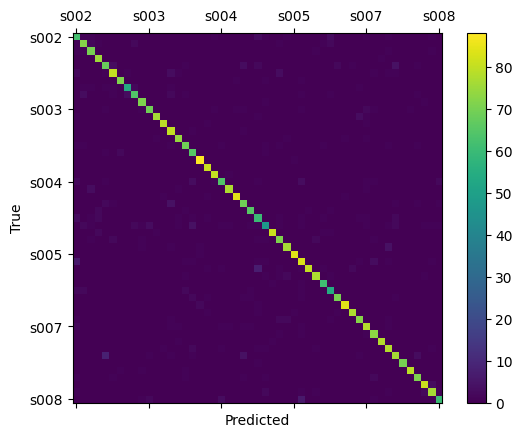

In [11]:
# Drawing confusion matrix for Multi Layer Perceptron results
from sklearn.metrics import confusion_matrix   #Imports the confusion_matrix function from sklearn.metrics
labels = list(pwd_data['subject'].unique())    #Extracts unique class labels from the 'subject' column of the pwd_data dataset and converts them into a list.
cm = confusion_matrix(y_test, y_pred)    #Computes the confusion matrix using the true labels (y_test) and predicted labels (y_pred).
figure = plt.figure()    #Creates a new figure for plotting.
axes = figure.add_subplot(111)    #Adds a subplot (1 row, 1 column, index 1) to the figure, which will hold the confusion matrix.
figure.colorbar(axes.matshow(cm))    #axes.matshow(cm): Visualizes the confusion matrix as a colored grid. figure.colorbar(...): Adds a color bar to indicate the scale of values in the confusion matrix.
axes.set_xticklabels([''] + labels)    #Sets the x-axis tick labels using the class labels. [''] + labels: The empty string aligns labels correctly with the grid.
axes.set_yticklabels([''] + labels)    #Sets the y-axis tick labels using the class labels. [''] + labels: The empty string aligns labels correctly with the grid.
plt.xlabel('Predicted')     #Labels the x-axis as "Predicted," indicating predicted classes.
plt.ylabel('True')      #Labels the y-axis as "True," indicating actual class labels.

This figure is a confusion matrix visualization, showing the performance of a classification model. Here is what it represents:

**1. Axes (True vs. Predicted Labels)**  
- **X-axis (Predicted Labels)**: Represents the model's predicted classifications.  
- **Y-axis (True Labels)**: Represents the actual class labels.  
- Labels (`s002`, `s003`, ..., `s008`) correspond to different subjects.

**2. Diagonal Line (Correct Predictions)**  
- The bright diagonal line indicates that most predictions are correct.  
- Each bright square along the diagonal represents instances where the predicted class matches the actual class.

**3. Off-Diagonal Elements (Misclassifications)**  
- Dark purple areas outside the diagonal indicate very few misclassifications.  
- Small scattered non-zero values suggest that some samples were incorrectly classified as another subject, but the misclassification rate is low.

**4. Color Bar (Prediction Frequency Scale)**  
- **Yellow/Green**: High values (correct classifications).  
- **Blue/Purple**: Low values (incorrect classifications).  
- The scale on the right represents the number of occurrences per class.

**Interpretation**  
- The classifier performs very well, with minimal misclassification.  
- The strong diagonal suggests the model distinguishes subjects effectively.

Hence, I started with the KNeighborsClassifier clustering algorithm followed by the support vector machine and the multilayer perceptron (MLP). Using MLP, we achieved the highest degree of accuracy in predictions, more than 90%.

Besides I also have shown the graphical representation of the average keystroke latency per subject and the confusion matrix of the results using the MLP.

**Biometric Authentication with Facial Recognition**

Facial recognition, a popular biometric authentication method, has grown more robust with AI advancements. Initially used alongside fingerprints in early 20th-century police operations, facial recognition now plays a crucial role in national security and personal identification. With the rise of internet use, traditional verification methods like IP addresses and passwords have proven insufficient. As a result, facial recognition is becoming the preferred choice for stricter identity verification, offering more reliable security.

**PCA**

PCA selects the hyperplane where data is most spread out, maximizing variance. This involves computing the covariance matrix and identifying its largest eigenvectors, which define the principal components. This process reduces dimensionality. Eigenvectors and eigenvalues come from linear algebra and are used in techniques like Eigenfaces for facial recognition. Using Python’s NumPy, we can compute variance, covariance, and the covariance matrix with `np.cov(X).T`, as shown in the following example.

In [12]:
import numpy as np    #Imports NumPy library as np.
X = np.array([
[3, 0.1, -2.4],
[3.1, 0.3, -2.6],
[3.4, 0.2, -1.9],
])      #Each row represents a data point, and each column represents a feature. Stores under a array X.
print(np.cov(X).T)    #np.cov(X) computes the covariance matrix of X, measuring how the features vary together. .T transposes the covariance matrix (swaps rows and columns). print(...) displays the transposed covariance matrix.

[[7.30333333 7.69166667 7.19166667]
 [7.69166667 8.12333333 7.54333333]
 [7.19166667 7.54333333 7.12333333]]


To understand the relevance of the Eigenvectors and Eigenvalues for the PCA, we must remember that a vector (such as the Eigenvector) represents an oriented element (characterized by a direction) in the linear space, while a scalar (such as the Eigenvalue) represents a measure of intensity (without direction).

Therefore, to identify the principal components within a covariance matrix, we need to look for the Eigenvectors that correspond to the higher Eigenvalues values. In this case, we can use the NumPy library to carry out our calculations.

The calculation of Eigenvectors and Eigenvalues (if they exist) is reduced to the following NumPy instructions:

In [14]:
import numpy as np    #Imports the NumPy library and assigns it the alias np, allowing us to use NumPy functions efficiently.
eigenvalues, eigenvectors = np.linalg.eig(np.array([[2, -4], [4, -6]]))     #np.linalg.eig(matrix) computes the eigenvalues and eigenvectors of the matrix.
print(eigenvalues)     #Prints eigenvalues.
print(eigenvectors)    #Prints eigenvectors.

[-1.99999996 -2.00000004]
[[0.70710678 0.70710678]
 [0.70710678 0.70710678]]


**Application of the Principal Component Analysis (PCA) Technique for Facial Recognition**

Here, we shall associate each image in our archive with the name corresponding to the person represented in the image. For implementing this, the reduction in dimensionality of the images to the main components have been implemented, followed by identifying the most relevant features for recognition purposes. These main components are termed as Eigenfaces.

Each image of our dataset can, therefore, be interpreted as a combination of these Eigenfaces. The image dataset is available for download at http:// vis- www. cs. umass. edu/ lfw/ lfw- funneled. tgz. In this example, we shall use the concept of Multi-layer Perceptron for doing the classification on images. The output of the Multi-layer Perceptron classifier is shown via classification_report(), which indicates the values of the precision, recall, and F1 score metrics.

In [3]:
from sklearn.datasets import fetch_lfw_people   #Imports the fetch_lfw_people function from the datasets module in sklearn. It is used to download and load the Labeled Faces in the Wild (LFW) dataset,which contains face images of various people.
from sklearn.decomposition import PCA   #Imports the PCA class from the decomposition module in sklearn.
from sklearn.neural_network import MLPClassifier  #Imports the MLPClassifier class from the neural_network module in sklearn.
from sklearn.model_selection import train_test_split  #Imports the train_test_split function from the model_selection module in sklearn.
from sklearn.metrics import classification_report   #Imports the classification_report function from the metrics module in sklearn.

In [4]:
lfw = fetch_lfw_people(min_faces_per_person=150)   #Downloads the Labeled Faces in the Wild (LFW) dataset, filtering to include only those individuals with at least 150 images. The dataset is stored in the variable lfw.
X_data = lfw.data    #Flattened pixel data of each face image is extracted from the dataset and stored in X_data.
y_target = lfw.target    #Line retrieves the numerical labels corresponding to each image, indicating which person is depicted, and stores them in y_target.
names = lfw.target_names   #Human-readable names for each target label are extracted and stored in names.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3)   #Dataset is split into training and testing sets, with 30% of the data reserved for testing. X_train and y_train are used for training, while X_test and y_test are used for evaluating model performance.
pca = PCA(n_components=150, whiten=True)    #A PCA object is created to reduce the data’s dimensionality to 150 components. The whiten=True parameter scales the components to have unit variance, which can help improve classification performance.
pca.fit(X_train)     #PCA model is fitted on the training data, computing the principal components based on the variance in X_train.
pca_train = pca.transform(X_train)   #Training data is transformed into the PCA space, reducing its dimensionality. The transformed data is stored in pca_train.
pca_test = pca.transform(X_test)   #Test data is transformed using the same PCA model, resulting in the lower-dimensional representation pca_test.
mlpc = MLPClassifier()   #Instance of MLPClassifier (a multi-layer perceptron neural network for classification) is created with default settings.
mlpc.fit(pca_train, y_train)   #MLPClassifier is trained on the PCA-transformed training data (pca_train) along with the corresponding labels (y_train).
y_pred = mlpc.predict(pca_test)   #The trained model predicts the labels for the PCA-transformed test data (pca_test), and the predictions are stored in y_pred.
print(classification_report(y_test, y_pred, target_names=names))  #The classification report is printed, which provides metrics like precision, recall, and F1-score for each class. The target_names parameter assigns the corresponding human-readable names to the classes.

               precision    recall  f1-score   support

 Colin Powell       0.89      0.84      0.86        68
George W Bush       0.93      0.96      0.95       162

     accuracy                           0.92       230
    macro avg       0.91      0.90      0.90       230
 weighted avg       0.92      0.92      0.92       230



**Conclusions**

This session illustrated the different state of art techniques that can be used for increasing the efficacies of user authentication procedures followed by promptly detecting the possible presence of compromised user accounts. These techniques include the use of biometric evidence, for instance, facial recognition, or biometric behavior, for instance, keyboard dynamics. In the final stage, the advantages and disadvantages associated with the use of biometric evidence for user authentication and recognition were discussed.

**References**

1. Schatz, Daniel; Bashroush, Rabih; Wall, Julie (2017). "Towards a More Representative Definition of Cyber Security". Journal of Digital Forensics, Security and Law. 12 (2).
2. Yost, Jeffrey R. (2015). "The Origin and Early History of the Computer Security Software Products Industry". IEEE Annals of the History of Computing. 37 (2): 46–58.
3. Sarker, I.H., Furhad, M.H. & Nowrozy, R (2021). "AI-Driven Cybersecurity: An Overview, Security Intelligence Modeling and Research Directions". SN COMPUT. SCI. 2, 173.
4. Halder, S., Ozdemir, S (2018). Hands-On Machine Learning for Cybersecurity.
5. Parisi, A (2019). Hands-On Artificial Intelligence for Cybersecurity.
6. Han, J., Pei, J., Kamber, M (2011). Data mining: concepts and techniques.